In [1]:
import numpy as np

<img src='tl.jpeg' width='600px' />

In [2]:
n_states = 5

states = ["Eat", "Hang", "Study", "Talk", "Sleep"]

Transition probability from state $i$ to state $j$  is $A_{i, j}$

In [3]:
A = np.array([[0.,  0.7, 0.1, 0,   0.2],
              [0.2, 0.4, 0,   0.2, 0.2],
              [0,   1.0, 0,   0,   0],
              [0,   0.3, 0,   0.7, 0],
              [0.1, 0.1, 0,   0, 0.8]])

In [4]:
# probabilities must sum to one

np.sum(A, axis=1)

array([ 1.,  1.,  1.,  1.,  1.])

Consider an emsemble of teenagers. At each time $t$ each of them can be in either of the states *E*, *H*, *St*, *T*, *Sl*.

A *population vector*, $s_{t}$, is a number of teenagers in each state at time $t$.

In [5]:
np.random.seed(1234)

# Initial population vector
s_0 = np.random.random(n_states)
s_0 /= s_0.sum()

s_0

array([ 0.0679945 ,  0.22086516,  0.15540499,  0.27882319,  0.27691216])

Time evolution of the population:

$$
s_{t+1} = A^T s_t
$$

In [6]:
s1 = np.dot(A.T, s_0)
s1

array([ 0.07186425,  0.40268538,  0.00679945,  0.23934926,  0.27930166])

In [7]:
s_sleep = np.array([0, 0, 0, 0, 1.])

In [8]:
np.dot(A.T, s_sleep)

array([ 0.1,  0.1,  0. ,  0. ,  0.8])

In [9]:
%matplotlib inline
from matplotlib import style as mstyle
mstyle.use('ggplot')
import matplotlib.pyplot as plt

from scipy import linalg

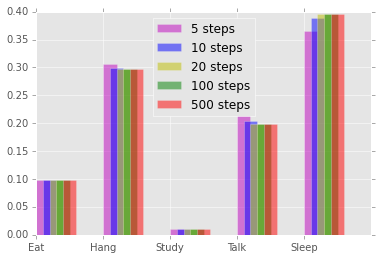

In [10]:
n_steps = [5, 10, 20, 100, 500]

fig, ax = plt.subplots()
ccycle = ['m', 'b', 'y', 'g', 'r']

for j, n in enumerate(n_steps):
    
    A_n = linalg.funm(A.T, lambda x: x**n)  # NB: this is *not*  (A.T)**n !
    s = np.dot(A_n, s_0)

    ax.bar(np.arange(n_states) + 0.1*j, s, 
           width=0.2, alpha=0.5, label=str(n)+' steps', color=ccycle[j])

ax.set_xticks(np.arange(n_states))
ax.set_xticklabels(states)
plt.legend(loc='best')

Equilibrium distribuion:

$$
s_{e} = A^T s_e
$$

which corresponds to $A$ having at least one eigenvalue equal to $1$.

In [11]:
linalg.det(A.T - np.eye(n_states))

5.9947164419982275e-18

In [12]:
s_stable = linalg.solve(A.T - np.eye(n_states),
                        np.ones(n_states))
s_stable /= s_stable.sum()
s_stable

array([ 0.0990099 ,  0.2970297 ,  0.00990099,  0.1980198 ,  0.3960396 ])

In [13]:
linalg.eigvals(A.T)

array([-0.13926032+0.10717296j, -0.13926032-0.10717296j,
        0.41644575+0.j        ,  1.00000000+0.j        ,  0.76207490+0.j        ])

##### Is the model ergodic? I.e. is there only one limiting distribution?|

In [14]:
B = A.T.copy()

for _ in range(32):
    B = np.dot(B, B)

print B

[[ 0.0990099   0.0990099   0.0990099   0.0990099   0.0990099 ]
 [ 0.29702971  0.29702971  0.29702971  0.29702971  0.29702971]
 [ 0.00990099  0.00990099  0.00990099  0.00990099  0.00990099]
 [ 0.19801981  0.19801981  0.19801981  0.19801981  0.19801981]
 [ 0.39603962  0.39603962  0.39603962  0.39603962  0.39603962]]



#### Simulate the random walk directly instead.


In [15]:
import scipy.stats as stats

np.random.seed(1234)

In [16]:
# A[i,:] is a vector of transition probabilities from state `i` 
# prob[i] is a corresponding discrete probability distribution

prob = [None] * n_states
for i in range(n_states):
    prob[i] = stats.rv_discrete(
                    values=(np.arange(n_states), A[i, :])
              )

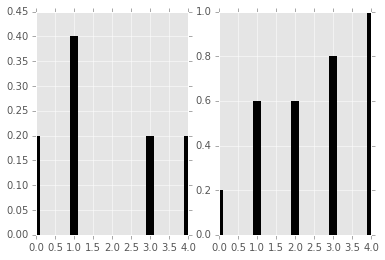

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2)

x = np.arange(n_states)
ax1.vlines(x, 0, prob[1].pmf(x), lw=8)
ax2.vlines(x, 0, prob[1].cdf(x), lw=8)

In [18]:
num_steps = 10000
histogram = np.zeros(n_states)

state = 0
for t in range(num_steps):
    state = prob[state].rvs()
    
    histogram[state] += 1.

In [19]:
histogram / histogram.sum()

array([ 0.1007,  0.2976,  0.0101,  0.2008,  0.3908])

In [20]:
s_stable

array([ 0.0990099 ,  0.2970297 ,  0.00990099,  0.1980198 ,  0.3960396 ])

BUT: Drawing random variates one by one is *slow*.